# Assignment 1 - London Crime Dataset

### Dataset Overview
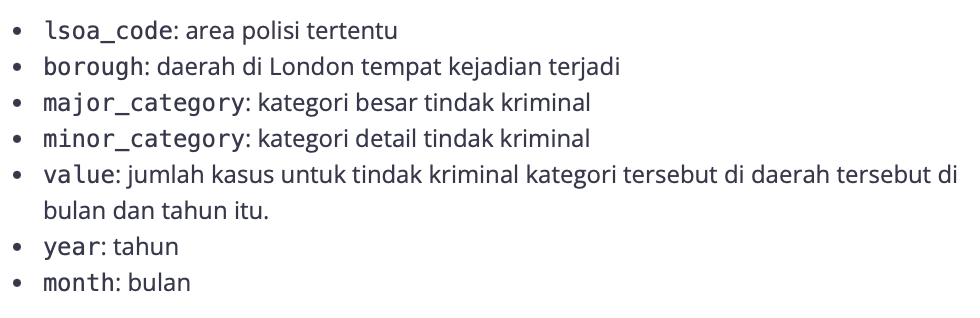

- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from wordcloud import WordCloud

In [6]:
# df_data = pd.read_csv('assignment1/data/london_crime_by_lsoa.csv', dtype={'year':str, 'month':str})
df_data = pd.read_csv('data/london_crime_by_lsoa.csv', dtype={'year':str, 'month':str})

In [7]:
# pip install pyarrow
# install untuk menggunakan parquet, di ubah ke parquet suapaya load data lebih ringan dibanding dengan csv


In [10]:
df_data.to_parquet('data/london_crime_by_lsoa.parquet')
df_data = pd.read_parquet('data/london_crime_by_lsoa.parquet')
df_data


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [11]:
df_data.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year              object
month             object
dtype: object

In [12]:
#describe
df_data.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
year,13490604,9,2016,1498956
month,13490604,12,11,1124217


jumlah data : 13.490.604

### Analisa Basic

In [13]:
df_data.shape

(13490604, 7)

In [14]:
sorted_years = sorted(df_data['year'].unique())
print(sorted_years)

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


total fitur ada : 7

jumlah borough : 33, dengan top borough adalah Croydon

Major Category punya 9 unique data & Minor Category ada 32 unique data

Data ini berisi total 9 tahun data, dari 2008 - 2016

value berisi mengenai jumlah laporan bulanan tiap wilayah

### Analisa dengan pie chart
Q : Jumlah major_category apa yg terbesar di London periode 2008 - 2016 ?

In [15]:
df_major_category = df_data[['major_category', 'value']].groupby('major_category').sum()

In [16]:
df_major_category

,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


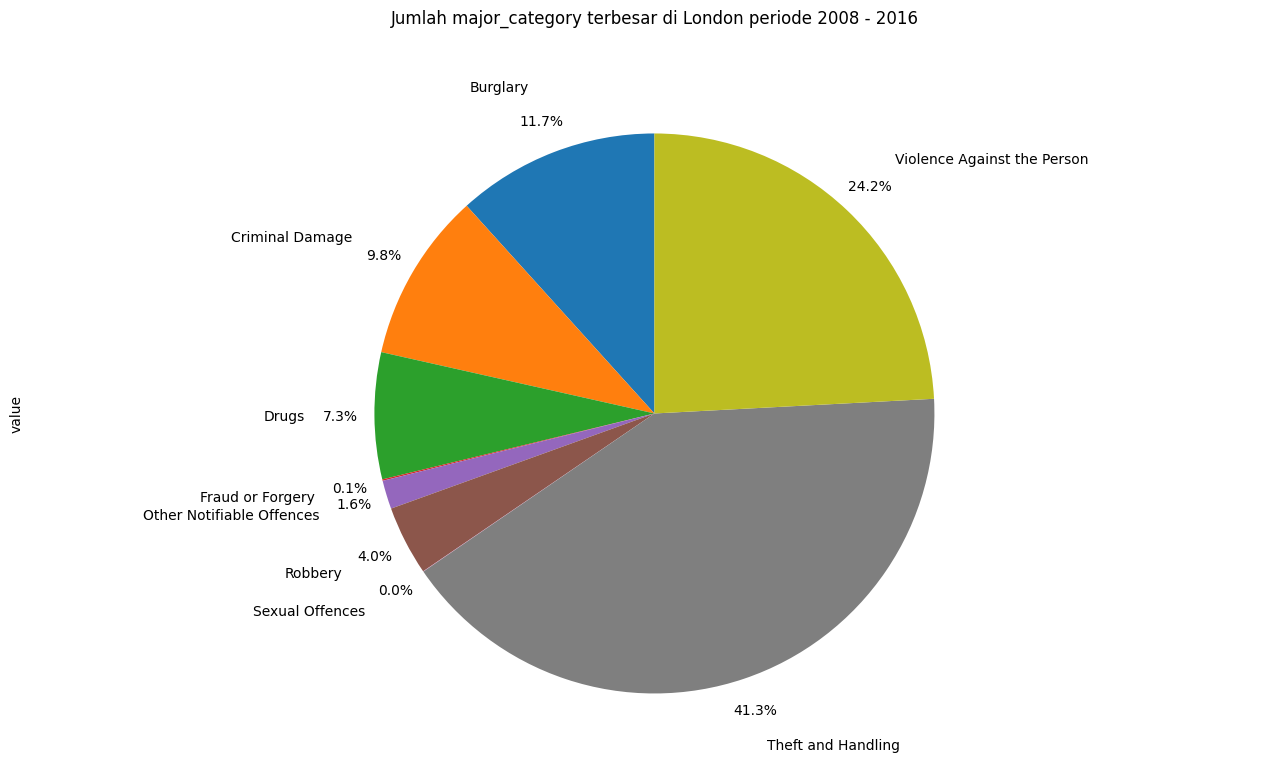

In [17]:
df_major_category['value'].plot(kind='pie',
                           figsize = (16,8),
                           autopct= '%1.1f%%',
                           startangle=90,
                           labels=df_major_category.index,
                           pctdistance= 1.12,
                           labeldistance = 1.25,
                        )
plt.title("Jumlah major_category terbesar di London periode 2008 - 2016", y=1.12)
plt.axis('equal')
plt.show()

dari chart diatas diketahui bahwa major_category paling besar adalah "Theft and Handling" di 41.3% & di posisi kedua ada "Violence Against the Person"

### Analisa dengan Bar Chart

Q : Di Borough mana terjadi "Theft & Handling" paling banyak ?

In [18]:
#filter data , "Theft and Handling"
theft_handling_data = df_data[df_data['major_category'] == "Theft and Handling"]

In [19]:
# Kelompokkan data berdasarkan borough dan hitung jumlah kasus
theft_handling_borough = theft_handling_data.groupby('borough')['value'].sum().reset_index()

In [20]:
# Urutkan borough berdasarkan jumlah kasus dari yang terbesar ke yang terkecil
theft_handling_borough_sorted = theft_handling_borough.sort_values(by='value', ascending=False)
theft_handling_borough_sorted.head()

,borough,value
32,Westminster,277617
5,Camden,140596
21,Lambeth,114899
27,Southwark,109432
18,Islington,107661


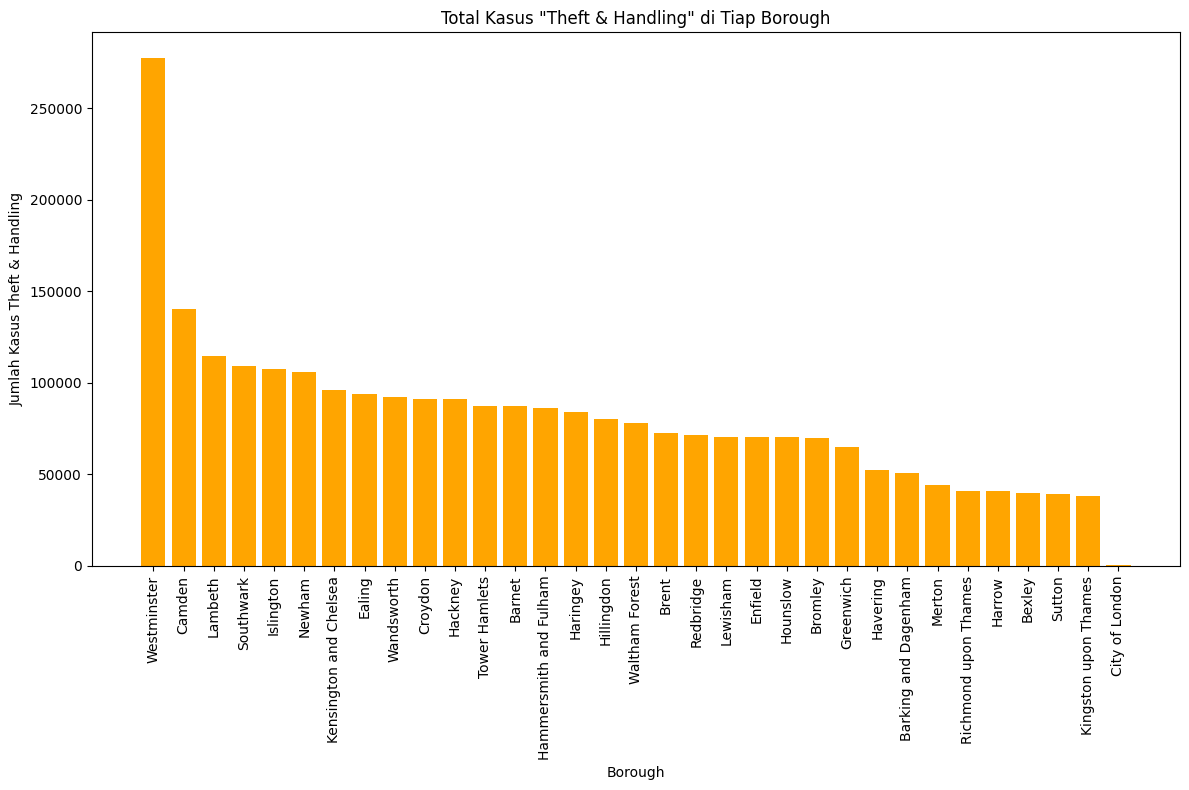

In [21]:
# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(theft_handling_borough_sorted['borough'], theft_handling_borough_sorted['value'], color='orange')
plt.title('Total Kasus "Theft & Handling" di Tiap Borough')
plt.xlabel('Borough')
plt.ylabel('Jumlah Kasus Theft & Handling')
plt.xticks(rotation=90)
plt.tight_layout()

# Tampilkan plot
plt.show()

pada data di atas diketahui paling banyak "Theft and Handling" terjadi di Borough Westminster sebanyak 277.617 kejadian sepanjang 2008 - 2016

### Line Chart

Q : bagaimana trend kejahatan tiap tahunnya ?

In [22]:
# Kelompokkan data berdasarkan tahun dan hitung total kasus per tahun
crime_trend_by_year = df_data.groupby('year')['value'].sum().reset_index()
crime_trend_by_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


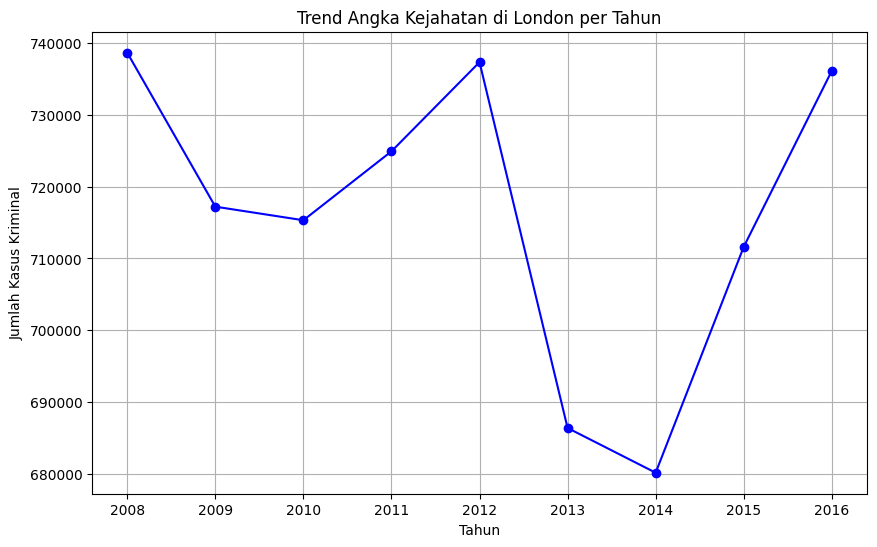

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(crime_trend_by_year['year'], crime_trend_by_year['value'], marker='o', linestyle='-', color='b')
plt.title('Trend Angka Kejahatan di London per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus Kriminal')
plt.grid(True)

- kasus paling banyak terjadi di 2008 & paling sedikit di 2014

- pada grafik terlihat penurunan paling banyak terjadi di tahun 2012 - 2013

### Folium Maps


In [24]:
df_crimes_val = df_data.loc[df_data['value']!=0]
df_crimes_val.describe(include=np.object)

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_1923/936329598.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_crimes_val.describe(include=np.object)


,lsoa_code,borough,major_category,minor_category,year,month
count,3419099,3419099,3419099,3419099,3419099,3419099
unique,4835,33,9,32,9,12
top,E01004734,Lambeth,Theft and Handling,Other Theft,2016,7
freq,2387,152784,1136994,297281,392042,296151


In [26]:
london_map = gpd.read_file('map/London_Borough_Excluding_MHW.shp')
crimesPerBorough = df_crimes_val.groupby('borough')['value'].sum()
joined = london_map.set_index('NAME').join(crimesPerBorough)

joined['coords'] = joined['geometry'].\
    apply(lambda x: x.representative_point().coords[:])
joined['coords'] = [coords[0] for coords in joined['coords']]

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_1923/1932037496.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(scalarMap, shrink=0.5)


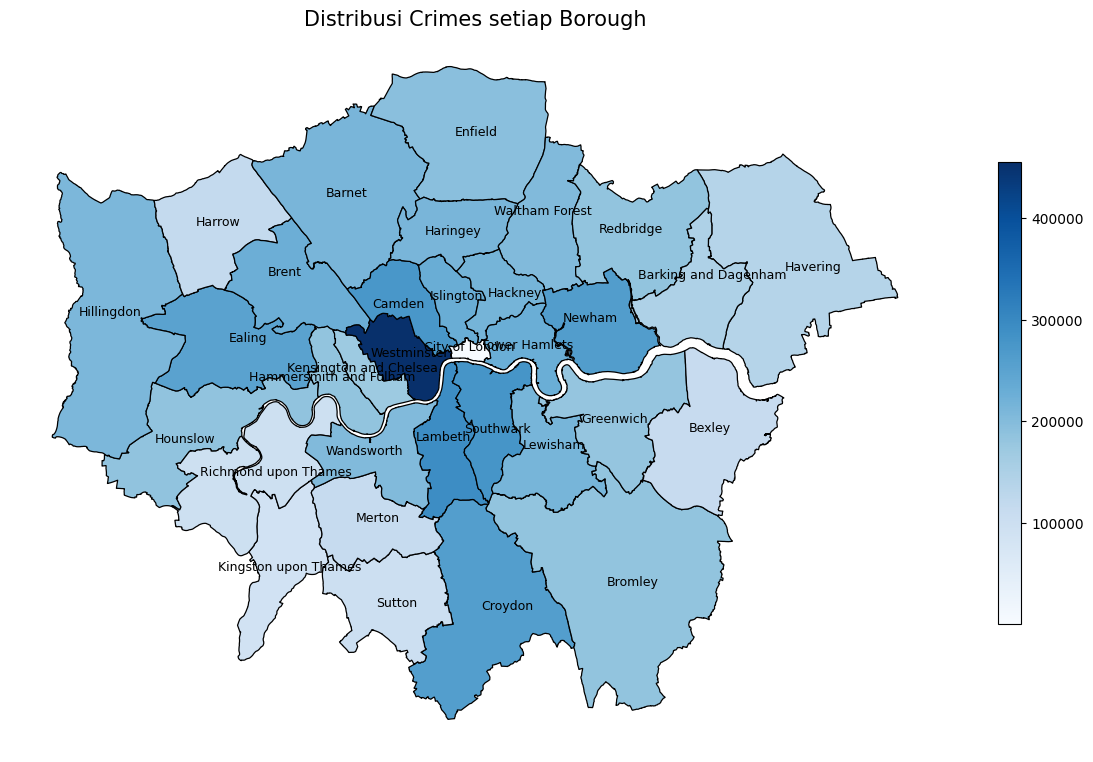

In [27]:
joined.plot(column='value', cmap='Blues', linewidth=0.9, edgecolor='black', 
            figsize=(15, 12))
plt.axis('off')
plt.title('Distribusi Crimes setiap Borough', fontsize=15)
scalarMap = plt.cm.ScalarMappable(cmap='Blues', 
                           norm=plt.Normalize(vmin=min(joined['value']), 
                                              vmax=max(joined['value'])))
scalarMap._A = []
cbar = plt.colorbar(scalarMap, shrink=0.5)
for idx, row in joined.iterrows():
    plt.annotate(idx, xy=row['coords'],
                 horizontalalignment='center', fontsize=9)

dapat dilihat pada peta semakin gelap warna pada peta artinya "borough" memiliki case yg semakin banyak & sebagai konfirmasi dari pernyataan sebelumnya bahwa "Westminster" adalah wilayah dengan case tertinggi di London periode 2008 - 2016

### WordCloud

In [28]:
# Gabungkan teks dari kolom minor_category
text = ' '.join(df_data['minor_category'].astype(str))

In [29]:
# Membuat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


In [30]:
minor_category_group = df_data.groupby('minor_category')['value'].sum().reset_index()

minor_category_group_sorted = minor_category_group.sort_values(by='value', ascending=False)
minor_category_group_sorted

,minor_category,value
21,Other Theft,980085
27,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
12,Harassment,458124
0,Assault with Injury,451001
25,Possession Of Drugs,431948
4,Common Assault,413690
28,Theft From Shops,345142
22,Other Theft Person,308842
7,Criminal Damage To Motor Vehicle,265463


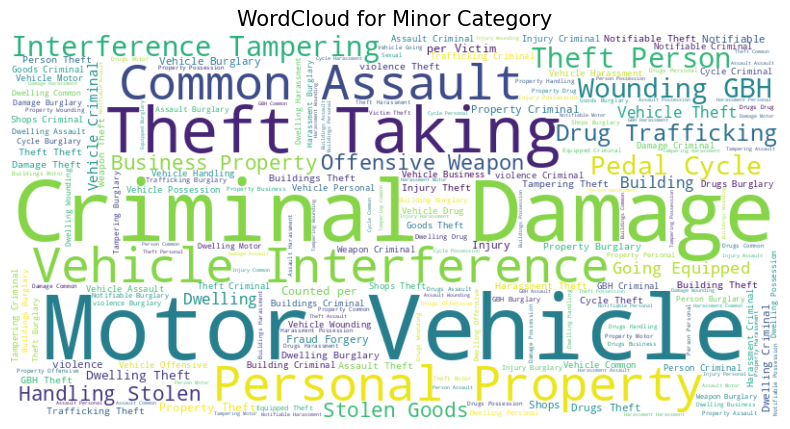

In [31]:
# Visualisasi WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Menghilangkan sumbu
plt.title('WordCloud for Minor Category', fontsize=15)
plt.show()

Pada wordcloud diatas data dilihat bahwa borough seperti Motor, Vehicle, Criminal, Damage tercetak dengan fontsize yang lebih besar dari yang lain dapat disimpulkan bahwa minor_category tersebut banyak disebut atau dituliskan karena banyak crime yg terjadi sesuai dengan word yg tertera

### Notes Pribadi mengenai case ini

- agak kesulitan mencari hal apa yang berkaitan , sehingga analisa tidak mendalam
- data yg besar cukup membuat proses lama
- dan menurut saya tidak sepenuhnya bisa di terapkan semua chart yg sudah pernah di pelajari